Buisness Analysis : 
Making Automatic classification of glass based on the elements used in the development of glass

Increase : Simplicity for users to select their required glass type 

In [2]:
import pandas as pd
import numpy as np

In [3]:
"""
Reading the dataset from directory and loading it using pandas 
"""

df = pd.read_csv("D:\\1-Data Science\\2-Dataset\\KNN\\glass.csv")

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
"""
Cheaking all the column names in the given dataset
"""
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
"""
looking at the target variable for analysis 
"""

df['Type']

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [7]:
""" 
Selecting 10 random values from the dataset 
"""

df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
93,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00,2
113,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14,2
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.00,0.00,2
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2


In [8]:
df.iloc[:,:9]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [9]:
len(df.columns)

10

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
def norm_funt(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [13]:
df_n = norm_funt(df.iloc[:,:9])
df_n

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [14]:
x = np.array(df_n)
x

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [15]:
y = np.array(df['Type'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train , y_test = train_test_split(x, y, test_size=0.2)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=21)

In [20]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [21]:
pred = model.predict(X_test)
pred

array([7, 1, 1, 2, 2, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 1, 1, 7, 1, 7, 2, 1,
       2, 1, 1, 2, 2, 7, 1, 1, 2, 7, 2, 2, 2, 1, 7, 2, 2, 2, 1, 1, 1],
      dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print(accuracy_score(pred, y_test))

0.6046511627906976


In [24]:
pd.crosstab(pred, y_test)

col_0,1,2,3,5,6,7
row_0,,,,,,
1,11,2,1,0,0,0
2,6,10,2,1,0,2
7,0,0,0,2,1,5


In [25]:
acc = []

In [26]:
for i in range(3,50,3):
    model = KNeighborsClassifier(n_neighbors=i)
    pred = model.fit(X_train, y_train)
    train_acc = np.mean(model.predict(X_train)==y_train)
    test_acc = np.mean(model.predict(X_test)== y_test)
    acc.append([train_acc, test_acc])

In [27]:
acc

[[0.8304093567251462, 0.7441860465116279],
 [0.7368421052631579, 0.627906976744186],
 [0.6608187134502924, 0.627906976744186],
 [0.6842105263157895, 0.5581395348837209],
 [0.6608187134502924, 0.627906976744186],
 [0.6491228070175439, 0.627906976744186],
 [0.6491228070175439, 0.6046511627906976],
 [0.6549707602339181, 0.627906976744186],
 [0.6666666666666666, 0.6511627906976745],
 [0.6491228070175439, 0.6046511627906976],
 [0.6491228070175439, 0.627906976744186],
 [0.6432748538011696, 0.6744186046511628],
 [0.6374269005847953, 0.6511627906976745],
 [0.6081871345029239, 0.6511627906976745],
 [0.6140350877192983, 0.6046511627906976],
 [0.6140350877192983, 0.6046511627906976]]

In [28]:
import matplotlib.pyplot as plt

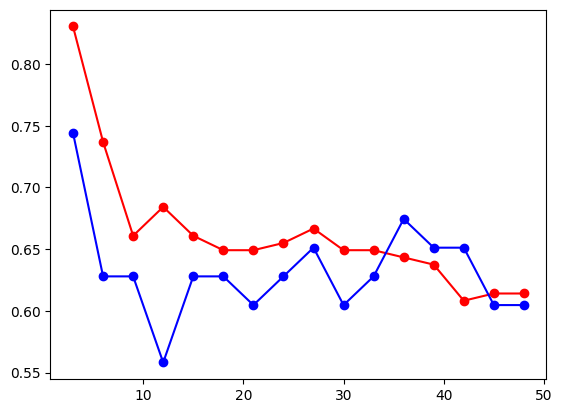

In [29]:
plt.plot(np.arange(3,50,3),[i[0] for i in acc], "ro-")
plt.plot(np.arange(3,50,3), [i[1] for i in acc], 'bo-')


In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pd.crosstab(pred, y_test)

col_0,1,2,3,5,6,7
row_0,,,,,,
1,12,3,1,0,0,0
2,5,8,2,2,0,1
5,0,1,0,0,0,0
6,0,0,0,0,1,1
7,0,0,0,1,0,5


In [31]:
accuracy_score(pred, y_test)

0.6046511627906976